In [1]:
import random
import pandas as pd
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control

In [2]:
!pip install scikit-fuzzy

In [25]:
dataProv = pd.read_csv("Dataset_Mango Classification - Data.csv")
dataFinal = dataProv.values
dataProv

,Id_Mango,Mango_Types,Mango_Shape,Mango_LeafShape,Mango_Color,Mango_Weight,Mango_Length,Mango_Circumference,Mango_Size
0,A01,Madu Anggur Mango,Round,Crinkled,Green,"342,5",10,"24,3",Medium
1,A02,Gedong Mango,Round,Flat,Yellow,"352,1","11,5","24,4",Small
2,A03,Kemang Mango,Oval,Crinkled,Green,"571,9","15,4","29,9",Large
3,A04,Chokanan Mango,Kidney Shaped,Flat,Yellow,"450,8",14,"25,1",Medium
4,A05,Garifta Mango,Kidney Shaped,Flat,Red,"445,6","13,5","26,8",Large
5,A06,Pakel Mango,Round,Flat,Green,"348,5","11,7","23,3",Small
6,A07,Kweni Mango,Round,Twisted,Green,"368,6","12,6","24,8",Medium
7,A08,Manalagi Mango,Kidney Shaped,Flat,Green,"440,2","14,3","27,6",Large
8,A09,Dodol Mango,Oval,Flat,Green,"402,2","12,3","25,8",Medium
9,A10,Lalijiwo Mango,Oval,Crinkled,Green,"507,4","14,7",27,Large


In [26]:
dataProv["Mango_Length"] = dataProv["Mango_Length"].apply(lambda x: float(x.replace(',','.')))
dataProv["Mango_Circumference"] = dataProv["Mango_Circumference"].apply(lambda x: float(x.replace(',','.')))
dataProv["Mango_Weight"] = dataProv["Mango_Weight"].apply(lambda x: float(x.replace(',','.')))

In [27]:
import math
def volume(t, r):
    volume = math.pi * r * r * t
    return volume
dataProv["Mango_Volume"] = dataProv["Mango_Circumference"] * dataProv["Mango_Circumference"] * dataProv["Mango_Length"] * math.pi

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataProv["Mango_Shape"] = le.fit_transform(dataProv["Mango_Shape"].values)
dataProv["Mango_LeafShape"] = le.fit_transform(dataProv["Mango_LeafShape"].values)
dataProv["Mango_Color"] = le.fit_transform(dataProv["Mango_Color"].values)
dataProv["Mango_Size"] = le.fit_transform(dataProv["Mango_Size"].values)
dataProv = dataProv[["Mango_Shape","Mango_LeafShape", "Mango_Color", "Mango_Weight", "Mango_Volume", "Mango_Size"]]

In [29]:
w = control.Antecedent(np.arange(dataProv["Mango_Weight"].min(),dataProv["Mango_Weight"].max(),0.2), 'weight')
v = control.Antecedent(np.arange(dataProv["Mango_Volume"].min(),dataProv["Mango_Volume"].max(),0.2), 'volume')
l = control.Antecedent(np.arange(dataProv["Mango_LeafShape"].min(),dataProv["Mango_LeafShape"].max(),1), 'leaf')
s = control.Antecedent(np.arange(dataProv["Mango_Shape"].min(),dataProv["Mango_Shape"].max(),1), 'shape')
c = control.Antecedent(np.arange(dataProv["Mango_Color"].min(),dataProv["Mango_Color"].max(),1), 'color')
size = control.Consequent(np.arange(dataProv["Mango_Size"].min(),dataProv["Mango_Size"].max(),1), 'size')

C:\Users\hp\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


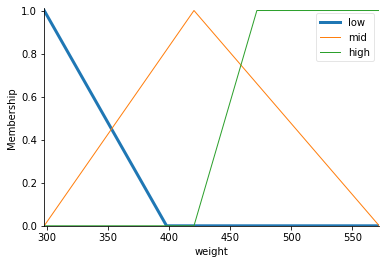

In [30]:
w['low'] = fuzzy.trapmf(w.universe, [0,0,dataProv["Mango_Weight"].min(),dataProv["Mango_Weight"].min()+100])
w['mid'] = fuzzy.trimf(w.universe, [dataProv["Mango_Weight"].min(),dataProv["Mango_Weight"].median(),dataProv["Mango_Weight"].max()])
w['high'] = fuzzy.trapmf(w.universe, [dataProv["Mango_Weight"].median(),dataProv["Mango_Weight"].max()-100,dataProv["Mango_Weight"].max(),dataProv["Mango_Weight"].max()])

w['low'].view()

C:\Users\hp\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


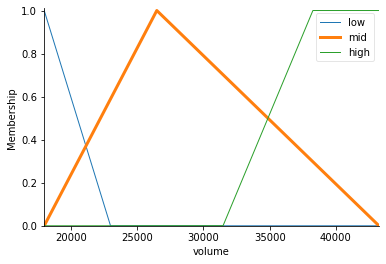

In [31]:
v['low'] = fuzzy.trapmf(v.universe, [0,0,dataProv["Mango_Volume"].min(),dataProv["Mango_Volume"].min()+5000])
v['mid'] = fuzzy.trimf(v.universe, [dataProv["Mango_Volume"].min(),dataProv["Mango_Volume"].median(),dataProv["Mango_Volume"].max()])
v['high'] = fuzzy.trapmf(v.universe, [dataProv["Mango_Volume"].median()+5000,dataProv["Mango_Volume"].max()-5000,dataProv["Mango_Volume"].max(),dataProv["Mango_Volume"].max()])

v['mid'].view()

C:\Users\hp\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


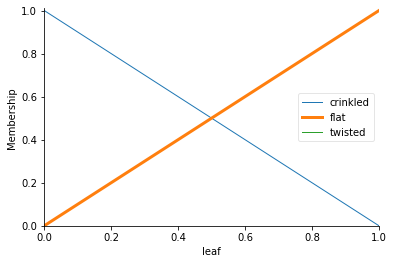

In [32]:
l['crinkled'] = fuzzy.trimf(l.universe, [0,dataProv["Mango_LeafShape"].min(),dataProv["Mango_LeafShape"].median()])
l['flat'] = fuzzy.trimf(l.universe, [dataProv["Mango_LeafShape"].min(),dataProv["Mango_LeafShape"].median(),dataProv["Mango_LeafShape"].max()])
l['twisted'] = fuzzy.trimf(l.universe, [dataProv["Mango_LeafShape"].median(),dataProv["Mango_LeafShape"].max(),dataProv["Mango_LeafShape"].max()])

l['flat'].view()

C:\Users\hp\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


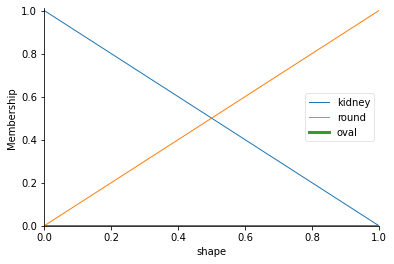

In [33]:
s['kidney'] = fuzzy.trimf(s.universe, [0,dataProv["Mango_Shape"].min(),dataProv["Mango_Shape"].median()])
s['round'] = fuzzy.trimf(s.universe, [dataProv["Mango_Shape"].min(),dataProv["Mango_Shape"].median(),dataProv["Mango_Shape"].max()])
s['oval'] = fuzzy.trimf(s.universe, [dataProv["Mango_Shape"].median(),dataProv["Mango_Shape"].max(),dataProv["Mango_Shape"].max()])

s['oval'].view()

C:\Users\hp\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


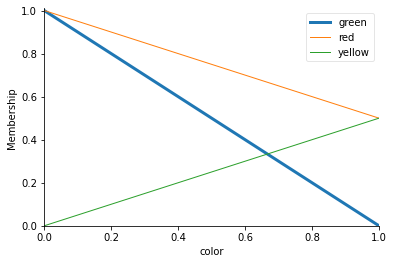

In [34]:
c['green'] = fuzzy.trimf(c.universe, [0,dataProv["Mango_Color"].min(),dataProv["Mango_Color"].median()])
c['red'] = fuzzy.trimf(c.universe, [dataProv["Mango_Color"].min(),dataProv["Mango_Color"].median(),dataProv["Mango_Color"].max()])
c['yellow'] = fuzzy.trimf(c.universe, [dataProv["Mango_Color"].median(),dataProv["Mango_Color"].max(),dataProv["Mango_Color"].max()])

c['green'].view()

C:\Users\hp\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


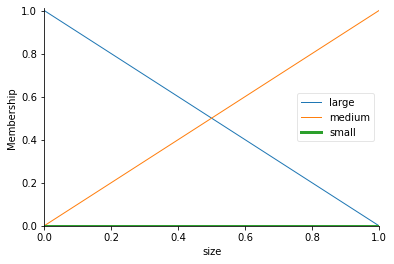

In [35]:
size['large'] = fuzzy.trimf(size.universe, [0,dataProv["Mango_Size"].min(),dataProv["Mango_Size"].median()])
size['medium'] = fuzzy.trimf(size.universe, [dataProv["Mango_Size"].min(),dataProv["Mango_Size"].median(),dataProv["Mango_Size"].max()])
size['small'] = fuzzy.trimf(size.universe, [dataProv["Mango_Size"].median(),dataProv["Mango_Size"].max(),dataProv["Mango_Size"].max()])

size['small'].view()

In [36]:
rule1 = control.Rule(w[ 'high' ] & v[ 'high' ] & ( l['flat'] | l['crinkled'] ) & ( s['kidney'] | s['round'] ), size['large'])
rule2 = control.Rule(w[ 'mid' ] & v[ 'mid' ], size[ 'medium' ])
rule3 = control.Rule(w[ 'low' ] & v['low'] & ( l['flat'] | l['twisted'] ) & ( c['yellow'] | c['green'] ) & ( s['kidney'] | s['oval'] ), size['small'])

In [37]:
size_ctrl = control.ControlSystem([rule1, rule2, rule3])
final_size = control.ControlSystemSimulation(size_ctrl)

0.3753433649724019


C:\Users\hp\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


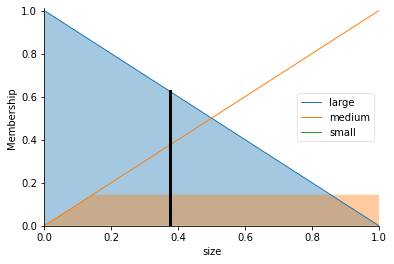

In [50]:
final_size.input[ 'weight' ] = 550
final_size.input[ 'volume' ] = 40000
final_size.input[ 'leaf' ] = 0
final_size.input[ 'shape' ] = 0
final_size.input[ 'color' ] = 3

final_size.compute()
# final_size.compute_rule(rule1)

print(final_size.output[ 'size' ])
size.view(sim=final_size)
